In [3]:
import numpy as np
import math
from scipy.stats import poisson
import time
import matplotlib.pyplot as plt

## Functions

In [4]:
I = 48  # Number of intervals
d = 5  # length of interval
x = np.random.choice(5, I)
N = sum(x)
precision = 0.9999
beta = 9  # Average service time for a patient
no_show = 0 # Fraction of scheduled patients not showing up
eind = 0
alpha_I = 0.2
alpha_T = 0.4  # patient doctor centric slider
alpha_W = 0.4

print(N)

93


In [5]:
def calcExponentialLimit(mu):
    return int(max(mu+4*mu**0.5, 100))

In [6]:
def binomCoeff(k, i):
  return math.factorial(k) / (math.factorial(k - i) * math.factorial(i))


def binomPMF(k, i, m, add_v, no_show):
  return binomCoeff(k, m) * add_v[m][i] * (1 - no_show)**m * no_show**(k-m)

In [7]:
# Distribution to calculate service time of patients
#	p[i]= probability of serving the patient in i mins given that
#	the average service time is beta.
def calculate_p(beta, size, precision=0.9999):  # Poisson distribution
    k = 0
    p = []

    while sum(p) < precision:  # fill accurate values up to precision limit
        p.append(poisson.pmf(k, beta))
        k += 1

    while len(p) < size:  # fill the rest of the values with 0
        p.append(0)
    return p, k

##########
## TEST ##
##########

probS = calcExponentialLimit(beta*N)+1
print(probS)
calculate_p(beta, probS, precision)


953


([0.00012340980408667956,
  0.0011106882367801166,
  0.004998097065510523,
  0.014994291196531574,
  0.033737155192196056,
  0.06072687934595293,
  0.09109031901892926,
  0.1171161244529091,
  0.13175564000952278,
  0.13175564000952278,
  0.11858007600857066,
  0.09702006218883041,
  0.0727650466416229,
  0.050375801521123684,
  0.03238444383500792,
  0.01943066630100472,
  0.010929749794315179,
  0.005786338126402172,
  0.0028931690632010803,
  0.0013704485036215655,
  0.0006167018266297063,
  0.0002643007828413016,
  0.00010812304752598687,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [8]:
def calculate_v(p, beta, precision, precision_limit, N, d, no_show=0):
  count = precision_limit
  limit = calcExponentialLimit(beta*N) + 1
  v = np.zeros((N+1, limit+d))
  add_v = np.zeros((N+1, limit+d))

  add_v[0][0] = 1
  for k in range(1, N+1):
    limit = calcExponentialLimit(beta*k)
    i = 0
    sum_v = 0
    while sum_v < precision and i <= limit:
      z = 0
      while z <= count:
        add_v[k][i] += p[z] * add_v[k-1][i-z]
        z += 1
      sum_v += add_v[k][i]
      i += 1

  for k in range(N+1):
    i = 0
    sum_v = 0
    while sum_v < precision and i <= limit:
      for m in range(k+1):
        v[k][i] += binomPMF(k, i, m, add_v, no_show)
      sum_v += v[k][i]
      i += 1

  return v, limit

##########
## TEST ##
##########

p, precision_limit = calculate_p(beta, probS, precision)
calculate_v(p, beta, precision, precision_limit, N, d, no_show)


(array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.23409804e-04, 1.11068824e-03, 4.99809707e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.52299797e-08, 2.74139635e-07, 2.46725672e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.05422980e-08, 4.60210250e-08, 2.21948467e-08, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 952)

In [9]:
def calculateProbabilities(x, precision, limit, v, I, d):
  p_plus = np.zeros((I+1, limit+d+1))
  p_min = np.zeros((I+1, limit+d+1))

  # Constraint 1
  p_min[0][0] = 1

  # Constraint 2
  sum_p = 0
  i = 0
  while sum_p < precision and i <= limit:
    p_plus[0][i] = v[x[0]][i]
    sum_p += p_plus[0][i]
    i += 1

  for t in range(1, I+1):  # calculate p_min and p_plus iteratively
    # Constraint 3
    for k in range(d+1):
      # probability of amount of work = 0 just before the start of t equals the cummulative probablity of amount of work less or equal to duration of the interval just at the start of the previous interval, t-1
      p_min[t][0] += p_plus[t-1][k]
    # Constraint 4
    for i in range(1, limit+1):

      # probability of amount of work = i just before the start of interval t equals the probablity of amount of work exceeding the duration of the interval by i just at the start of the previous interval, t-1
      p_min[t][i] = p_plus[t-1][i+d]

    # Constraint 5
    if t != I:  # I or I+1
      for i in range(limit+1):
        for j in range(i+1):
          p_plus[t][i] += p_min[t][j] * v[x[t]][i-j]

  return p_min, limit

##########
## TEST ##
##########

v, limit = calculate_v(p, beta, precision, precision_limit, N, d, no_show)
p_min, limit = calculateProbabilities(x, precision, limit, v, I, d)


In [10]:
def calcTardiness(p_min, limit, I):
  tardiness = 0
  # print(p_min[I])
  for k in range(limit):
    tardiness += k * p_min[I][k]  # I+1
  return tardiness


def calcIdletime(I, d, tardiness, N, no_show, beta):
  return (I * d) + tardiness - (N * (1 - no_show) * beta)  # I-1?


def calcWaitingtime(p_min, x, p, limit, I, N):
  w = np.zeros((I+1, N+1, limit+1))
  waitingtime = 0

  for t in range(0, I):
    if x[t] > 0:
      for k in range(limit):
        w[t][0][k] = p_min[t][k]
    if x[t] > 1:
      for i in range(1, x[t]+1):
        for k in range(limit+1):
          for j in range(k+1):
            w[t][i][k] += w[t][i-1][j] * p[k-j]

  for t in range(0, I):
    for i in range(0, x[t]):
      for k in range(limit+1):
        waitingtime += w[t][i][k] * k

  waitingtime /= N
  return waitingtime

##########
## TEST ##
##########

calcWaitingtime(p_min, x, p, limit, I, N)


281.82438856305396

In [11]:
def calcFracExcess(p_min, I):
  fracExcess = 0
  t = I+1
  for j in range(1, len(p_min[t])):
    fracExcess += p_min[t][j]
  fracExcess *= 100
  return fracExcess


##########
## TEST ##
##########

# calcFracExcess(p_min, I)


<div>
<img src="https://github.com/witusj/obp/blob/master/images/fitness2.png?raw=true" width="450">
<img src="https://github.com/witusj/obp/blob/master/images/fitness.png?raw=true" width="450">
</div>

In [12]:
def calcFitness(x, beta, precision, limit, v, N, no_show, I, d, eind, alpha_W, alpha_I, alpha_T):
  tic = time.perf_counter()
  p_min, limit = calculateProbabilities(x, precision, limit, v, I, d)
  toc = time.perf_counter()
  probT = toc-tic

  # Tardiness calcs
  tic = time.perf_counter()
  tardiness = calcTardiness(p_min, limit, I)
  toc = time.perf_counter()
  tardT = toc-tic

  # Idle time calcs new array of given shape and type, filled with zeros.
  tic = time.perf_counter()
  idletime = calcIdletime(I, d, tardiness, N, no_show, beta)
  toc = time.perf_counter()
  idletimeT = toc-tic

  # Waiting time calcs
  tic = time.perf_counter()
  waitingtime = calcWaitingtime(p_min, x, p, limit, I, N)
  toc = time.perf_counter()
  waitingtimeT = toc-tic

  objVal = alpha_W*waitingtime + alpha_I*idletime + alpha_T*tardiness

  print(f"Schedule: {x},\nN: {sum(x)},\nObjective value: {objVal},\nProb calculation time: {probT:.6f} sec,\nWaiting time (timer): {waitingtime} ({waitingtimeT:.6f} sec),\nIdle time (timer): {idletime} ({idletimeT:.6f} sec),\nTardiness (timer): {tardiness} ({tardT:.6f} sec)\n")

  # Collect into a dictionary
  results = {'p_min': p_min, 'waitingTime': waitingtime,
            'idleTime': idletime, 'tardiness': tardiness, 'objVal': objVal}

  if eind == 1:
    fracExcess = calcFracExcess(p_min, I)
    results['fracExcess'] = fracExcess

  return results

##########
## TEST ##
##########


p, precision_limit = calculate_p(beta, probS, precision)
v, limit = calculate_v(p, beta, precision, precision_limit, N, d, no_show)



results = calcFitness(x, beta, precision, limit, v, N, no_show,
                  I, d, eind, alpha_W, alpha_I, alpha_T)
results


Schedule: [2 1 2 0 0 0 4 2 1 0 3 1 2 0 4 1 2 4 1 1 3 4 4 1 1 1 0 3 1 4 1 0 4 0 1 1 4
 2 4 3 0 4 4 2 3 3 4 0],
N: 93,
Objective value: 349.2670422018469,
Prob calculation time: 17.349139 sec,
Waiting time (timer): 281.82438856305396 (34.267444 sec),
Idle time (timer): -3.7711887056244677 (0.000002 sec),
Tardiness (timer): 593.2288112943755 (0.000338 sec)



{'p_min': array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [3.23993451e-004, 7.19452059e-004, 1.85001958e-003, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [1.54361169e-004, 2.59311131e-004, 5.87758961e-004, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        ...,
        [6.37549379e-134, 3.94290173e-133, 2.54161158e-132, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [2.40678029e-143, 1.77391008e-142, 1.30581562e-141, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [3.97185502e-139, 1.88876419e-138, 1.03692126e-137, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]]),
 'waitingTime': 281.82438856305396,
 'idleTime': -3.7711887056244677,
 'tardiness': 593.2288112943755,
 'objVal': 349.2670422018469}

In [13]:
def createDist(arr, reverse=False):
    minX, maxX = arr.min(), arr.max()
    minY, maxY = 0, 1
    if(reverse):
        minY, maxY = maxY, minY
    # Scale to values between 0, 1 and make total sum equal to 1
    arrScaled = np.interp(arr, (minX, maxX), (minY, maxY))
    arrNorm = [x / arrScaled.sum() for x in arrScaled]
    return(arrNorm)
    

##########
## TEST ##
##########

arr = np.random.choice(10, 5)
dist1 = createDist(arr)
dist2 = createDist(arr, reverse=True)
arr, dist1, sum(dist1), dist2, sum(dist2)


(array([0, 9, 3, 0, 2]),
 [0.0, 0.6428571428571429, 0.2142857142857143, 0.0, 0.14285714285714288],
 1.0,
 [0.29032258064516125,
  0.0,
  0.19354838709677422,
  0.29032258064516125,
  0.22580645161290322],
 1.0)

<div>
<img src="https://github.com/witusj/obp/blob/master/images/crossover.png?raw=true" width="450">
<img src="https://github.com/witusj/obp/blob/master/images/crossover2.png?raw=true" width="450">
</div>

In [12]:
## OLD
def crossover(parent1, parent2, nSwaps):
    child1 = parent1.copy()
    child2 = parent2.copy()
    
    I = len(child1)
    
    # Calculate distribution for choosing intervals that will swap patients
    # The distribution is the normalized schedule. Intervals with zero patients will never be selected.
    # norm1 = sum(child1)
    # p1 = child1 / norm1
    p1 = createDist(child1)
    
    # The number of swaps should not exceed the maximum number of patients in any interval. Otherwise it might happen that the number of patients that are transfered exceeds availability, resulting in a negative amount.
    max1 = int(max(child1))
    max2 = int(max(child2))
    nSwaps = min(nSwaps, max1, max2)
    
    # Swap patients parent1 to parent 2
    i = np.random.choice(I, nSwaps, p=p1)
    for i in i:
        child1[i] += -1
        child2[i] += 1
    
    # Swap patients parent2 to parent 1
    # norm2 = sum(child2)
    # p2 = child2 / norm2
    p2 = createDist(child2)
    
    j = np.random.choice(I, nSwaps, p=p2)
    for j in j:
        child1[j] += 1
        child2[j] += -1
    return(child1, child2)

##########
## TEST ##
##########


parent1 = np.random.choice(5, I)
parent2 = np.random.choice(5, I)

print(parent1, parent2)
nSwaps = 3
children = crossover(parent1, parent2, nSwaps)
children


[2 4 3 1 3 1 4 3 0 4 2 1 1 4 1 0 4 4 2 3 4 1 3 2 4 4 2 1 4 2 2 0 4 2 2 2 0
 4 3 1 4 1 1 1 1 0 4 3] [0 1 3 1 1 2 3 3 0 4 3 2 4 0 4 4 4 4 4 4 4 1 3 1 0 0 0 1 3 2 0 2 1 3 3 2 3
 3 1 1 0 3 2 2 2 3 3 0]


(array([2, 4, 3, 1, 3, 1, 4, 3, 0, 4, 2, 1, 1, 4, 1, 0, 4, 4, 2, 3, 4, 1,
        3, 2, 3, 4, 2, 1, 4, 2, 2, 0, 4, 2, 2, 1, 1, 4, 2, 1, 4, 1, 1, 1,
        1, 1, 5, 3]),
 array([0, 1, 3, 1, 1, 2, 3, 3, 0, 4, 3, 2, 4, 0, 4, 4, 4, 4, 4, 4, 4, 1,
        3, 1, 1, 0, 0, 1, 3, 2, 0, 2, 1, 3, 3, 3, 2, 3, 2, 1, 0, 3, 2, 2,
        2, 2, 2, 0]))

In [14]:
def crossover(parent1, parent2, nSwaps):
    child1 = parent1.copy()
    child2 = parent2.copy()
    
    I = len(child1)
    
    # Calculate distribution for choosing intervals that will swap patients
    # The distribution is the normalized schedule. Intervals with zero patients will never be selected.
    p1 = createDist(child1)
    
    # Swap patients parent1 to parent 2
    n1 = nSwaps
    while(n1 > 0):
        i = np.random.choice(I, 1, p=p1)
        child1[i] += -1
        child2[i] += 1
        if(child1[i] == 0):
            p1 = createDist(child1) # If the number of patients in interval i reaches zero, this interval should not be selected again.
        n1 -= 1
    
    # Swap patients parent2 to parent 1
    p2 = createDist(child2)
    
    n2 = nSwaps
    while(n2 > 0):
        i = np.random.choice(I, 1, p=p2)
        child2[i] += -1
        child1[i] += 1
        if(child2[i] == 0):
            p2 = createDist(child2)
        n2 -= 1
        
    return(child1, child2)

##########
## TEST ##
##########

testI = 10
parent1 = np.random.choice(5, testI)
parent2 = np.random.choice(5, testI)

print(parent1, parent2)
nSwaps = 3
children = crossover(parent1, parent2, nSwaps)
children


[3 1 1 0 0 4 3 1 4 0] [1 3 2 4 0 4 3 2 1 1]


(array([2, 1, 1, 1, 0, 4, 2, 2, 4, 0]), array([2, 3, 2, 3, 0, 4, 4, 1, 1, 1]))


<div>
    <img src="https://github.com/witusj/obp/blob/master/images/mutation.png?raw=true" width="450">
    <img src="https://github.com/witusj/obp/blob/master/images/mutation1.png?raw=true" width="450">
</div>

In [15]:
def mutate(child, rate):
    if np.random.rand() < rate:
        x = len(child)
        i, j = np.random.choice(x, 2, replace=False).astype(int)
        a, b = child[i], child[j]
        child[i], child[j] = b, a
    return(child)

##########
## TEST ##
##########

child = children[0].copy()
print(child)
child = mutate(child, 1)
print(child)


[2 1 1 1 0 4 2 2 4 0]
[2 1 0 1 1 4 2 2 4 0]


## Classes

#### Suggesties: [get / set methods](https://www.geeksforgeeks.org/getter-and-setter-in-python/) voor parameters / met tests / nuttig voor optimaliseren hyper parameters, bv mbv bayesian stats

Create a data object to store and generate initial data.

In [16]:
class Data:
    def __init__(self, I=10, N=12, d=5, popSize=5, beta=9, precision=0.9999, no_show=0, eind=0, alpha_I=0.2, alpha_T=0.3, alpha_W=0.5, nSwaps=4, mutationRate=0.1):
        self.I = I
        self.N = N
        self.d = d
        self.popSize = popSize
        self.beta = beta
        self.precision = precision
        self.no_show = no_show
        self.probSize = calcExponentialLimit(self.beta*self.N)+1
        self.p, self.precision_limit = self.__calculate_p()
        self.v, self.limit = self.__calculate_v()
        self.eind = eind
        self.alpha_I, self.alpha_T, self.alpha_W = alpha_I, alpha_T, alpha_W
        self.nSwaps, self.mutationRate = nSwaps, mutationRate
    
    def get_initial_data(self): return np.array((self.I, self.N, self.d, self.beta, self.popSize, self.eind, self.alpha_I, self.alpha_T, self.alpha_W, self.nSwaps, self.mutationRate),
                                                dtype={'names': ('I', 'N', 'd', 'beta', 'popSize', 'eind', 'alpha_I', 'alpha_T', 'alpha_W', 'nSwaps', 'mutationRate'),
                                                'formats': ('i4', 'i4', 'i4', 'i4', 'i4', 'i4', 'f8', 'f8', 'f8', 'i4', 'f8')})

    def get_prob_data(self): return np.array((self.precision, self.no_show, self.probSize, self.precision_limit, self.limit),
                                                dtype={'names': ('precision', 'no_show', 'probSize', 'precision_limit', 'limit'),
                                                'formats': ('f8', 'f8', 'i4', 'f8', 'i4')})

    def calculate_p(self):  return calculate_p(self.beta, self.probSize, self.precision)
    __calculate_p = calculate_p
    
    def calculate_v(self): return calculate_v(self.p, self.beta, self.precision, self.precision_limit, self.N, self.d, self.no_show)
    __calculate_v = calculate_v
    

##########
## TEST ##
##########

newDataObject = Data(I, N)
initData = newDataObject.get_initial_data()
initData[['N', 'popSize']]


array((93, 5),
      dtype={'names': ['N', 'popSize'], 'formats': ['<i4', '<i4'], 'offsets': [4, 16], 'itemsize': 60})

<img src="https://github.com/witusj/obp/blob/master/images/population.png?raw=true" width="600">

Create a random individual. An individual is in this case one schedule.

In [17]:
class Schedule:
    def __init__(self, dataObject):
        self.I = dataObject.get_initial_data()['I']  # Number of intervals
        self.N = dataObject.get_initial_data()['N']  # Number of patients
        self.x = np.zeros(self.I).astype(int)# Empty schedule

    def create_random_schedule(self):
        for i in range(self.N):
            i = np.random.choice(self.I, 1)  # Interval ID
            self.x[i] = self.x[i] + 1
    def get_schedule(self): return(self.x)
    def print_schedule(self): print(self.x)


##########
## TEST ##
##########

dataObject = Data(I=I, N=N, d=d)
scheduleObject = Schedule(dataObject)
scheduleObject.print_schedule()
scheduleObject.create_random_schedule()
schedule = scheduleObject.get_schedule()
schedule

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


array([1, 5, 0, 3, 3, 4, 2, 2, 4, 3, 2, 4, 1, 1, 2, 0, 3, 1, 0, 3, 2, 2,
       0, 1, 1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 3, 1, 0, 3, 3, 1, 2, 1, 1,
       1, 3, 0, 4])

Create population of individuals

In [18]:
class Population:
    def __init__(self, dataObject, individuals=None):
        self.dataObject = dataObject
        self.params = self.dataObject.get_initial_data()
        self.prob_params = self.dataObject.get_prob_data()
        self.p, self.v = self.dataObject.p, self.dataObject.v
        self.individuals = individuals
        if self.individuals == None: self.__create_new_individuals() 
        self.fitnessScores = []

    def create_new_individuals(self):
        self.individuals = []
        for i in range(self.params['popSize']):
            x = Schedule(self.dataObject)
            x.create_random_schedule()
            x = x.get_schedule()
            self.individuals.append(x)
            
    __create_new_individuals = create_new_individuals
    
    def get_individuals(self): return(self.individuals)
    
    def calc_fitness_scores(self):
            beta, N, I, d, eind, alpha_W, alpha_I, alpha_T = self.params[['beta', 'N', 'I', 'd', 'eind', 'alpha_W', 'alpha_I', 'alpha_T']].tolist()
            precision, limit, no_show = self.prob_params[['precision', 'limit', 'no_show']].tolist()
            self.fitnessScores = np.array([calcFitness(x, beta=beta, precision=precision, limit=limit, v=self.v, N=N, no_show=no_show, I=I, d=d, eind=eind, alpha_W=alpha_W, alpha_I=alpha_I, alpha_T=alpha_T)['objVal'] for x in self.individuals])
            
    def apply_crossover(self):
        newIndividuals = []
        nSwaps = self.params['nSwaps']*1 ## Times 1 because otherwise refers to memorypoint
        mutationRate = self.params['mutationRate']
        self.population_dist = createDist(self.fitnessScores, reverse=True)
        
        for i in range(self.params['popSize']):
            r1, r2 = np.random.choice(self.params['popSize'], 2, replace=False, p=self.population_dist)
            parent1, parent2 = self.individuals[r1], self.individuals[r2]
            child1, child2 = crossover(parent1, parent2, nSwaps)
            newIndividuals.append(mutate(child1, mutationRate))
            newIndividuals.append(mutate(child2, mutationRate))
        beta, N, I, d, eind, alpha_W, alpha_I, alpha_T = self.params[[
            'beta', 'N', 'I', 'd', 'eind', 'alpha_W', 'alpha_I', 'alpha_T']].tolist()
        precision, limit, no_show = self.prob_params[[
            'precision', 'limit', 'no_show']].tolist()
        self.fitnessScores = np.array([calcFitness(x, beta=beta, precision=precision, limit=limit, v=self.v, N=N, no_show=no_show,
                                            I=I, d=d, eind=eind, alpha_W=alpha_W, alpha_I=alpha_I, alpha_T=alpha_T)['objVal'] for x in newIndividuals])
        tempList = list(range(self.params['popSize']*2))
        zipped = list(zip(*sorted(zip(self.fitnessScores, tempList))))
        self.fitnessScore = zipped[0][:self.params['popSize']]
        tempList = zipped[1][:self.params['popSize']]
        self.individuals = list(map(newIndividuals.__getitem__, tempList))
        print(self.fitnessScore, '\n', self.individuals)


## Tests

In [19]:
##########
## TEST ##
##########

dataObject = Data()
populationObject1 = Population(dataObject)
populationObject1.fitnessScores
populationObject1.calc_fitness_scores()
print(populationObject1.fitnessScores)


Schedule: [0 3 2 0 1 2 0 0 2 2],
N: 12,
Objective value: 35.650253759293456,
Prob calculation time: 0.112949 sec,
Waiting time (timer): 31.562678619704943 (0.135492 sec),
Idle time (timer): 4.937828898881975 (0.000003 sec),
Tardiness (timer): 62.93782889888197 (0.000073 sec)

Schedule: [1 2 1 0 3 2 1 0 1 1],
N: 12,
Objective value: 31.984125274366242,
Prob calculation time: 0.092550 sec,
Waiting time (timer): 29.141017146643495 (0.093543 sec),
Idle time (timer): 0.027233402088995717 (0.000002 sec),
Tardiness (timer): 58.02723340208899 (0.000064 sec)

Schedule: [0 1 0 0 0 5 0 1 1 4],
N: 12,
Objective value: 41.604773575376385,
Prob calculation time: 0.115140 sec,
Waiting time (timer): 32.4790847589837 (0.122738 sec),
Idle time (timer): 15.930462391769069 (0.000005 sec),
Tardiness (timer): 73.93046239176907 (0.000079 sec)

Schedule: [1 3 1 1 1 1 0 2 0 2],
N: 12,
Objective value: 31.98299006717786,
Prob calculation time: 0.085662 sec,
Waiting time (timer): 29.14042526229821 (0.071864 sec)

In [20]:
individuals2 = populationObject1.individuals.copy()
populationObject2 = Population(dataObject, individuals=individuals2)
print(populationObject1.individuals, '\n', populationObject2.individuals)

[array([0, 3, 2, 0, 1, 2, 0, 0, 2, 2]), array([1, 2, 1, 0, 3, 2, 1, 0, 1, 1]), array([0, 1, 0, 0, 0, 5, 0, 1, 1, 4]), array([1, 3, 1, 1, 1, 1, 0, 2, 0, 2]), array([2, 2, 1, 0, 1, 2, 1, 1, 0, 2])] 
 [array([0, 3, 2, 0, 1, 2, 0, 0, 2, 2]), array([1, 2, 1, 0, 3, 2, 1, 0, 1, 1]), array([0, 1, 0, 0, 0, 5, 0, 1, 1, 4]), array([1, 3, 1, 1, 1, 1, 0, 2, 0, 2]), array([2, 2, 1, 0, 1, 2, 1, 1, 0, 2])]


In [21]:
populationObject2.calc_fitness_scores()
populationObject2.apply_crossover()
populationObject2.individuals


Schedule: [0 3 2 0 1 2 0 0 2 2],
N: 12,
Objective value: 35.650253759293456,
Prob calculation time: 0.115062 sec,
Waiting time (timer): 31.562678619704943 (0.145748 sec),
Idle time (timer): 4.937828898881975 (0.000003 sec),
Tardiness (timer): 62.93782889888197 (0.000086 sec)

Schedule: [1 2 1 0 3 2 1 0 1 1],
N: 12,
Objective value: 31.984125274366242,
Prob calculation time: 0.085576 sec,
Waiting time (timer): 29.141017146643495 (0.083304 sec),
Idle time (timer): 0.027233402088995717 (0.000002 sec),
Tardiness (timer): 58.02723340208899 (0.000054 sec)

Schedule: [0 1 0 0 0 5 0 1 1 4],
N: 12,
Objective value: 41.604773575376385,
Prob calculation time: 0.096598 sec,
Waiting time (timer): 32.4790847589837 (0.137528 sec),
Idle time (timer): 15.930462391769069 (0.000002 sec),
Tardiness (timer): 73.93046239176907 (0.000086 sec)

Schedule: [1 3 1 1 1 1 0 2 0 2],
N: 12,
Objective value: 31.98299006717786,
Prob calculation time: 0.102958 sec,
Waiting time (timer): 29.14042526229821 (0.074355 sec)

[array([1, 2, 1, 1, 1, 2, 0, 0, 0, 4]),
 array([1, 0, 1, 1, 3, 1, 1, 0, 1, 3]),
 array([2, 1, 2, 0, 1, 1, 1, 1, 0, 3]),
 array([1, 2, 1, 0, 3, 1, 1, 1, 0, 2]),
 array([1, 0, 1, 1, 3, 2, 1, 1, 1, 1])]

In [23]:
# Initial population
dataObject = Data()
populationZero = Population(dataObject)
populationZero.calc_fitness_scores()
individuals = populationZero.individuals.copy()
generations = 3

# Genetic algorithm loop
for i in range(generations):
    print(f'Generation: {i}')
    populationObject = Population(dataObject, individuals=individuals)
    populationObject.calc_fitness_scores()
    populationObject.apply_crossover()
    individuals = populationObject.individuals


Schedule: [2 1 2 3 0 0 0 1 2 1],
N: 12,
Objective value: 32.52763646090531,
Prob calculation time: 0.094421 sec,
Waiting time (timer): 30.31326265763121 (0.105005 sec),
Idle time (timer): -0.05798973582058409 (0.000002 sec),
Tardiness (timer): 57.942010264179416 (0.000067 sec)

Schedule: [1 1 1 0 1 0 1 3 2 2],
N: 12,
Objective value: 28.420495765488226,
Prob calculation time: 0.090161 sec,
Waiting time (timer): 21.549471665821425 (0.080789 sec),
Idle time (timer): 0.491519865155027 (0.000002 sec),
Tardiness (timer): 58.491519865155034 (0.000054 sec)

Schedule: [2 1 1 1 0 1 0 0 3 3],
N: 12,
Objective value: 29.240076952569748,
Prob calculation time: 0.095725 sec,
Waiting time (timer): 23.67913315229877 (0.113856 sec),
Idle time (timer): 0.0010207528407306654 (0.000005 sec),
Tardiness (timer): 58.001020752840724 (0.000072 sec)

Schedule: [2 1 1 0 2 0 0 1 2 3],
N: 12,
Objective value: 29.41007187321998,
Prob calculation time: 0.102865 sec,
Waiting time (timer): 24.07033033681641 (0.096802

In [25]:
precision = 0.9999
N = 24  # number of patients
beta = 9  # average service time for a patient
T = 4*60  # total time
d = 5  # interval size
I = int(T/d)  # number of intervals
no_show = 0
eind = 0
alpha_I = 0.2
alpha_T = 0.4  # patient doctor centric slider
alpha_W = 0.4
popSize = 10

# Initial population
dataObject = Data(N=N, beta=beta, d=d, I=I, no_show=no_show, eind=eind, alpha_I=alpha_I, alpha_T=alpha_T, alpha_W=alpha_W, popSize=popSize)
populationZero = Population(dataObject)
populationZero.calc_fitness_scores()
individuals = populationZero.individuals.copy()
generations = 3

# Genetic algorithm loop
score_list = []
for i in range(generations):
    print(f'Generation {i}')
    populationObject = Population(dataObject, individuals=individuals)
    populationObject.calc_fitness_scores()
    best_score = min(populationObject.fitnessScores)
    score_list.append(best_score)
    populationObject.apply_crossover()
    individuals = populationObject.individuals.copy()


Schedule: [0 1 0 0 0 1 2 0 0 1 1 0 0 0 1 2 0 1 0 1 0 0 0 1 0 0 0 1 0 2 0 0 0 3 1 0 1
 0 0 1 0 1 0 0 0 0 2 0],
N: 24,
Objective value: 15.40123821913905,
Prob calculation time: 1.648565 sec,
Waiting time (timer): 9.682077045713903 (0.381102 sec),
Idle time (timer): 35.21401233475581 (0.000002 sec),
Tardiness (timer): 11.214012334755813 (0.000095 sec)

Schedule: [0 0 1 0 0 2 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1 2 0 1 0 0 1 0 0 0 0 0 1 1 1 0 3
 1 0 1 0 1 1 1 1 0 1 0],
N: 24,
Objective value: 32.87359834860027,
Prob calculation time: 1.557916 sec,
Waiting time (timer): 14.382881125224783 (0.310393 sec),
Idle time (timer): 61.200743164183905 (0.000002 sec),
Tardiness (timer): 37.20074316418393 (0.000094 sec)

Schedule: [0 0 0 1 0 4 0 1 0 0 0 3 0 1 0 0 0 0 0 0 1 1 0 2 0 2 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 1 0 2 0 0 0],
N: 24,
Objective value: 13.308714776249875,
Prob calculation time: 1.436244 sec,
Waiting time (timer): 15.3258907437195 (0.471532 sec),
Idle time (timer): 27.963930797936797 (0.000002

In [26]:
print(score_list)

[8.787913735489646, 9.672581278917, 9.1508587366655]


In [24]:
precision = 0.9999
N = 24  # number of patients
beta = 9  # average service time for a patient
T = 4*60  # total time
d = 5  # interval size
I = int(T/d)  # number of intervals
no_show = 0
eind = 0
alpha_I = 0.2
alpha_T = 0.4  # patient doctor centric slider
alpha_W = 0.4
popSize = 30

# Initial population
dataObject = Data(N=N, beta=beta, d=d, I=I, no_show=no_show, eind=eind,
                    alpha_I=alpha_I, alpha_T=alpha_T, alpha_W=alpha_W, popSize=popSize)
populationZero = Population(dataObject)
populationZero.calc_fitness_scores()
individuals = populationZero.individuals.copy()
generations = 10

# Genetic algorithm loop
score_list = []
for i in range(generations):
    print(f'Generation {i}')
    populationObject = Population(dataObject, individuals=individuals)
    populationObject.calc_fitness_scores()
    best_score = min(populationObject.fitnessScores)
    score_list.append(best_score)
    populationObject.apply_crossover()
    individuals = populationObject.individuals.copy()


Schedule: [0 1 0 2 0 0 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 1 2 0 1 0 0 1 0 1 1 1 0 0 1 2 1
 0 2 0 1 0 0 1 0 0 0 0],
Objective value: 17.026600920882867,
Prob calculation time: 1.560910 sec,
Waiting time (timer): 12.74525564862473 (0.386719 sec),
Idle time (timer): 35.8808311023883 (0.000002 sec),
Tardiness (timer): 11.880831102388287 (0.000095 sec)

Schedule: [0 0 0 1 0 1 1 0 1 2 1 1 0 0 0 0 0 0 0 2 2 0 0 0 2 0 1 0 0 0 0 2 0 0 1 0 0
 1 0 2 1 0 0 0 0 0 0 2],
Objective value: 17.48988674678274,
Prob calculation time: 1.558504 sec,
Waiting time (timer): 10.992133208028996 (0.510143 sec),
Idle time (timer): 37.821722439285224 (0.000002 sec),
Tardiness (timer): 13.821722439285239 (0.000122 sec)

Schedule: [1 0 0 0 1 1 1 0 0 1 0 0 0 1 3 1 0 0 1 2 0 2 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 2 0 0],
Objective value: 14.937579895018827,
Prob calculation time: 1.519567 sec,
Waiting time (timer): 16.73281020674499 (0.428572 sec),
Idle time (timer): 29.740759687201376 (0.000002 sec),
Tardiness (t

[10.413848886203798, 10.413848886203798, 7.232807065707181, 6.861211481920001, 6.017327740576891, 5.439102226145318, 5.3849912833882625, 4.903847987858848, 4.800000000000001, 4.800000000000001]


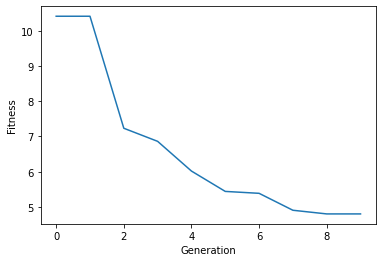

In [25]:
print(score_list)
plt.plot(score_list)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.show()
